In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder

In [3]:
# Step 1: Load the Dataset
data = pd.read_csv("C:\\Users\\HP\\OneDrive\\POWER BI\\Employee.csv")

In [4]:
# Step 2: Data Exploration
print(data.head())
print(data.describe())


   Company   Age  Salary     Place Country  Gender
0      TCS  20.0     NaN   Chennai   India       0
1  Infosys  30.0     NaN    Mumbai   India       0
2      TCS  35.0  2300.0  Calcutta   India       0
3  Infosys  40.0  3000.0     Delhi   India       0
4      TCS  23.0  4000.0    Mumbai   India       0
              Age       Salary      Gender
count  130.000000   124.000000  148.000000
mean    30.484615  5312.467742    0.222973
std     11.096640  2573.764683    0.417654
min      0.000000  1089.000000    0.000000
25%     22.000000  3030.000000    0.000000
50%     32.500000  5000.000000    0.000000
75%     37.750000  8000.000000    0.000000
max     54.000000  9876.000000    1.000000


In [5]:
# Step 3: Data Cleaning
# Check for missing values
print(data.isnull().sum())

Company     8
Age        18
Salary     24
Place      14
Country     0
Gender      0
dtype: int64


In [7]:
# Replace 0 in age with NaN
data['Age'].replace(0, np.nan, inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_57136\3874627285.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].replace(0, np.nan, inplace=True)


In [8]:
# Remove duplicate rows
data.drop_duplicates(inplace=True)

In [10]:
# Finding outliers using IQR
Q1 = data['Age'].quantile(0.25)
Q3 = data['Age'].quantile(0.75)
IQR = Q3 - Q1


In [11]:
# Remove outliers
data = data[(data['Age'] >= (Q1 - 1.5 * IQR)) & (data['Age'] <= (Q3 + 1.5 * IQR))]

In [13]:
# Treat null values
data.fillna(data.mode(), inplace=True)  

In [14]:
# Step 4: Data Analysis
# Filter data with age > 40 and salary < 5000
filtered_data = data[(data['Age'] > 40) & (data['Salary'] < 5000)]
print(filtered_data)

     Company   Age  Salary      Place Country  Gender
21   Infosys  50.0  3184.0      Delhi   India       0
32   Infosys  45.0  4034.0   Calcutta   India       0
39   Infosys  41.0  3000.0     Mumbai   India       0
50   Infosys  41.0  3000.0    Chennai   India       0
57   Infosys  51.0  3184.0  Hyderabad   India       0
68   Infosys  43.0  4034.0     Mumbai   India       0
75   Infosys  44.0  3000.0     Cochin   India       0
86   Infosys  41.0  3000.0      Delhi   India       0
93   Infosys  54.0  3184.0     Mumbai   India       0
104  Infosys  44.0  4034.0      Delhi   India       0
122  Infosys  44.0  3234.0     Mumbai   India       0
129  Infosys  50.0  3184.0   Calcutta   India       0
138      CTS  44.0  3033.0     Cochin   India       0
140  Infosys  44.0  4034.0  Hyderabad   India       0
145  Infosys  44.0  4034.0      Delhi   India       1


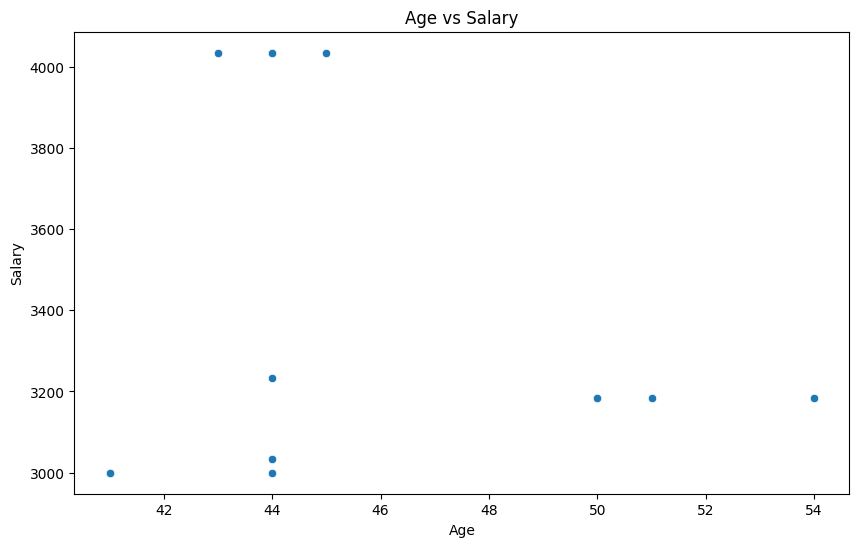

In [15]:
# Plotting Age vs Salary
plt.figure(figsize=(10, 6))
sns.scatterplot(data=filtered_data, x='Age', y='Salary')
plt.title('Age vs Salary')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.show()


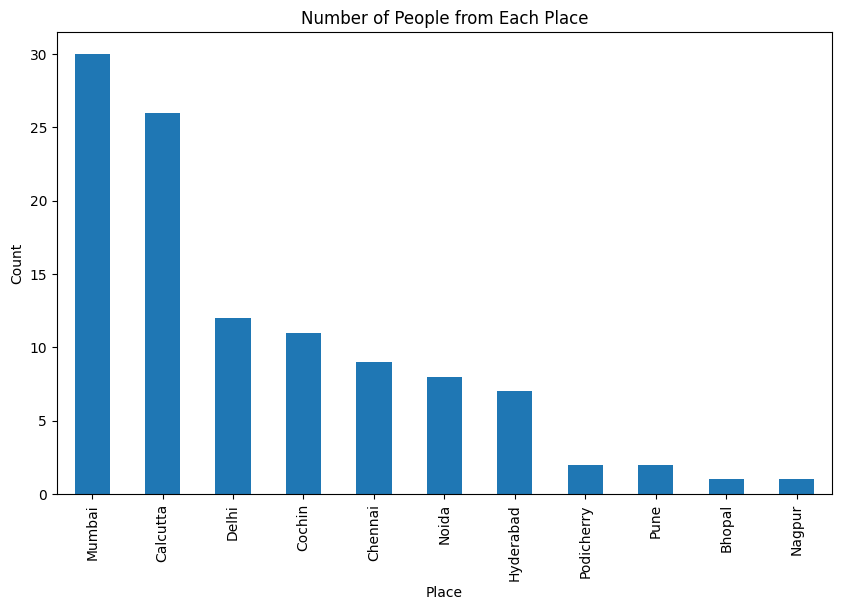

In [17]:
# Count number of people from each place
place_counts = data['Place'].value_counts()
plt.figure(figsize=(10, 6))
place_counts.plot(kind='bar')
plt.title('Number of People from Each Place')
plt.xlabel('Place')
plt.ylabel('Count')
plt.show()

In [ ]:
# Step 5: Data Encoding
# One-hot encoding for categorical columns (replace 'categorical_column' with actual column names)
data = pd.get_dummies(data, columns=['Age', 'Place'], drop_first=True)

In [ ]:
# Step 6: Feature Scaling
# Define feature set
features = data.drop('Salary', axis=0)  
target = data['Salary']


In [ ]:
# Standard scaling
scaler = StandardScaler()
scaled_features_standard = scaler.fit_transform(features)

In [ ]:
# Min-Max scaling
minmax_scaler = MinMaxScaler()
scaled_features_minmax = minmax_scaler.fit_transform(features)

In [ ]:
# Convert scaled features back to DataFrame if needed
scaled_features_standard = pd.DataFrame(scaled_features_standard, columns=features.columns)
scaled_features_minmax = pd.DataFrame(scaled_features_minmax, columns=features.columns)

In [ ]:
# Now you can use scaled_features_standard or scaled_features_minmax for your machine learning model